In [390]:
import sys
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import signal, ndimage, fftpack
import numba
from skimage import restoration

sdt_path = ".."
if sdt_path not in sys.path:
    sys.path.insert(1, sdt_path)
    
from sdt import io, brightness, image, sim, loc

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%load_ext line_profiler

# from_raw_image

In [4]:
img = np.load(os.path.join("..", "tests", "daostorm_3d", "data_find", "bead_img.npz"))["img"]
local_max = np.load(os.path.join("..", "tests", "daostorm_3d", "data_find", "bead_finder.npz"))["local_max"]
local_max = pd.DataFrame(local_max[:, [1, 3]], columns=["x", "y"])

## Profile

In [5]:
def make_loc(n=1):
    ret = []
    for i in range(n):
        l = local_max.copy()
        l["frame"] = i
        ret.append(l)
    return pd.concat(ret)

In [6]:
n = 10
loc = make_loc(n)
loc2 = make_loc(n)
frames = [img] * n

In [8]:
%timeit brightness.from_raw_image(loc, frames, 3, 2, engine="numba")

2.4 ms ± 71.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
%timeit brightness.from_raw_image(loc, frames, 3, 2, engine="python")

71.2 ms ± 2.35 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Test using simulated data

In [479]:
n_data = 50
n_samp = 100
x, y = [a.flatten() for a in np.broadcast_arrays(np.arange(1, n_data + 1)[:, None],
                                                 np.arange(1, n_samp + 1)[None, :])]
x *= 20
y *= 20
xy = np.column_stack([x, y])
mass = np.repeat(np.linspace(0, 5000, n_data), n_samp)
size = 1

noise_mean = 220
noise_std = 5

In [480]:
sim_img = sim.simulate_gauss((x.max() + 20, y.max() + 20), xy, mass, size, mass=True)
sim_img += np.random.normal(noise_mean, noise_std, sim_img.shape)
# sim_img += 100 * np.exp(-np.sum((np.indices(sim_img.shape) - 105)**2, axis=0) / (2 * 50**2))

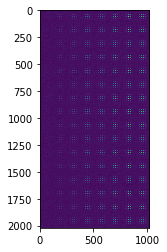

In [345]:
fig, ax = plt.subplots()
ax.imshow(sim_img)

In [229]:
br_df = pd.DataFrame(xy, columns=["x", "y"])
br_df["frame"] = 0

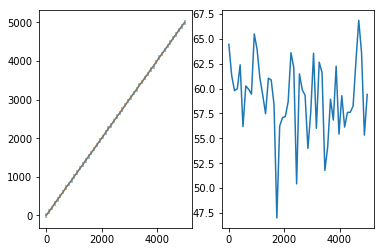

In [332]:
brightness.from_raw_image(br_df, [sim_img], 4, bg_frame=2,
                          engine="python", bg_estimator=np.mean,
                          mask="circle")
mm = []
ms = []
mu = np.sort(np.unique(mass))
for m in mu:
    cur = (mass == m)
    cur = br_df.loc[cur, "mass"]
    mm.append(cur.mean())
    ms.append(cur.std())
fig, (ax, ax2) = plt.subplots(1, 2)
ax.errorbar(mu, mm, yerr=ms, alpha=0.6)
ax.plot(mu, mu)
ax2.plot(mu, ms)

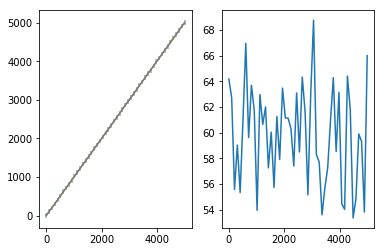

In [484]:
brightness.from_raw_image(br_df, [sim_img], 4, bg_frame=2,
                          engine="python", bg_estimator=np.mean,
                          mask="circle")
mm = []
ms = []
mu = np.sort(np.unique(mass))
for m in mu:
    cur = (mass == m)
    cur = br_df.loc[cur, "mass"]
    mm.append(cur.mean())
    ms.append(cur.std())
fig, (ax, ax2) = plt.subplots(1, 2)
ax.errorbar(mu, mm, yerr=ms, alpha=0.6)
ax.plot(mu, mu)
ax2.plot(mu, ms)

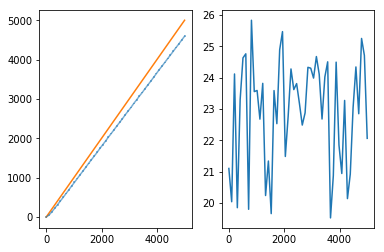

In [370]:
brightness.from_raw_image(br_df, [image.cg(sim_img, 3, nonneg=True)], 4, bg_frame=10,
                          engine="python", bg_estimator=np.mean,
                          mask="circle")
mm = []
ms = []
mu = np.sort(np.unique(mass))
for m in mu:
    cur = (mass == m)
    cur = br_df.loc[cur, "mass"]
    mm.append(cur.mean())
    ms.append(cur.std())
fig, (ax, ax2) = plt.subplots(1, 2)
ax.errorbar(mu, mm, yerr=ms, alpha=0.6)
ax.plot(mu, mu)
ax2.plot(mu, ms)

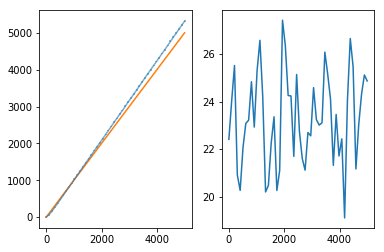

In [485]:
brightness.from_raw_image(br_df, [image.cg(sim_img, 3, nonneg=True)], 4, bg_frame=10,
                          engine="python", bg_estimator=np.mean,
                          mask="circle")
mm = []
ms = []
mu = np.sort(np.unique(mass))
for m in mu:
    cur = (mass == m)
    cur = br_df.loc[cur, "mass"]
    mm.append(cur.mean())
    ms.append(cur.std())
fig, (ax, ax2) = plt.subplots(1, 2)
ax.errorbar(mu, mm, yerr=ms, alpha=0.6)
ax.plot(mu, mu)
ax2.plot(mu, ms)

In [486]:
np.polyfit(mu, mm, 1)

array([  1.07549277, -63.88995322])

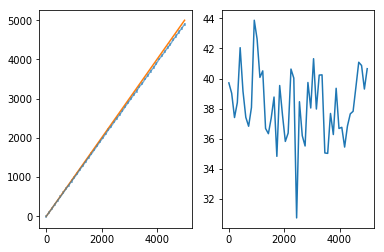

In [366]:
brightness.from_raw_image(br_df, [ndimage.gaussian_filter(sim_img, sigma=1)], 4, bg_frame=2,
                          engine="python", bg_estimator=np.mean,
                          mask="circle")
mm = []
ms = []
mu = np.sort(np.unique(mass))
for m in mu:
    cur = (mass == m)
    cur = br_df.loc[cur, "mass"]
    mm.append(cur.mean())
    ms.append(cur.std())
fig, (ax, ax2) = plt.subplots(1, 2)
ax.errorbar(mu, mm, yerr=ms, alpha=0.6)
ax.plot(mu, mu)
ax2.plot(mu, ms)

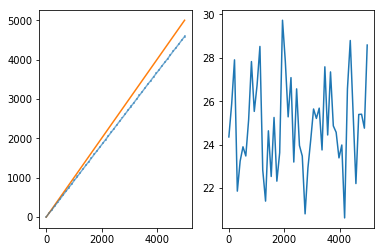

In [489]:
brightness.from_raw_image(br_df, [ndimage.gaussian_filter(sim_img, sigma=1)], 3, bg_frame=2,
                          engine="python", bg_estimator=np.mean,
                          mask="circle")
mm = []
ms = []
mu = np.sort(np.unique(mass))
for m in mu:
    cur = (mass == m)
    cur = br_df.loc[cur, "mass"]
    mm.append(cur.mean())
    ms.append(cur.std())
fig, (ax, ax2) = plt.subplots(1, 2)
ax.errorbar(mu, mm, yerr=ms, alpha=0.6)
ax.plot(mu, mu)
ax2.plot(mu, ms)

In [490]:
np.polyfit(mu, mm, 1)

array([ 0.91750892,  0.87261496])

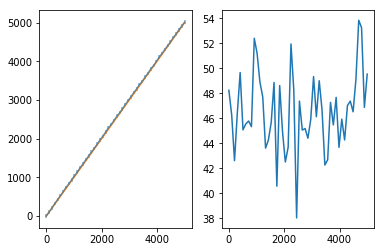

In [347]:
brightness.from_raw_image(br_df, [signal.wiener(sim_img, 3, 20)], 4, bg_frame=2,
                          engine="python", bg_estimator=np.mean,
                          mask="circle")
mm = []
ms = []
mu = np.sort(np.unique(mass))
for m in mu:
    cur = (mass == m)
    cur = br_df.loc[cur, "mass"]
    mm.append(cur.mean())
    ms.append(cur.std())
fig, (ax, ax2) = plt.subplots(1, 2)
ax.errorbar(mu, mm, yerr=ms, alpha=0.6)
ax.plot(mu, mu)
ax2.plot(mu, ms)

In [318]:
np.polyfit(mu, mm, 1)

array([ 0.9747499 , -1.04092658])

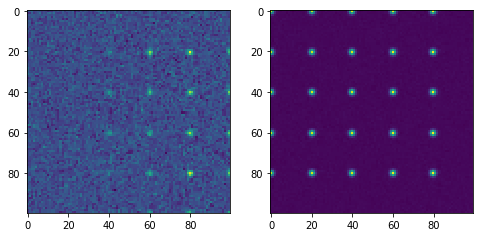

In [487]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
i = restoration.denoise_wavelet(sim_img.astype(np.uint16))
ax1.imshow(i[:100, :100])
ax2.imshow(i[-100:, -100:])

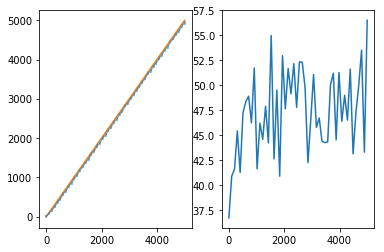

In [488]:
maxi = sim_img.max()
brightness.from_raw_image(br_df, [restoration.denoise_wavelet(sim_img/maxi, wavelet="db1", sigma=13/maxi)*maxi],
                          4, bg_frame=2,
                          engine="python", bg_estimator=np.mean,
                          mask="circle")
mm = []
ms = []
mu = np.sort(np.unique(mass))
for m in mu:
    cur = (mass == m)
    cur = br_df.loc[cur, "mass"]
    mm.append(cur.mean())
    ms.append(cur.std())
fig, (ax, ax2) = plt.subplots(1, 2)
ax.errorbar(mu, mm, yerr=ms, alpha=0.6)
ax.plot(mu, mu)
ax2.plot(mu, ms)

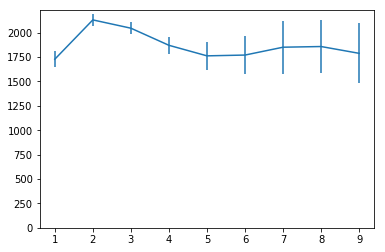

In [85]:
rs = np.arange(1, 10)
mm = []
ms = []
for r in rs:
    res = brightness.from_raw_image(br_df, [image.cg(sim_img, 2, nonneg=True)], r,
                                    bg_frame=2, engine="python", bg_estimator=np.mean,
                                    mask="square")
    mm.append(np.mean(br_df["mass"]))
    ms.append(np.std(br_df["mass"]))
fig, ax = plt.subplots()
ax.errorbar(rs, mm, yerr=ms)
ax.set_ylim(0);

In [90]:
ld = loc.daostorm_3d.locate(sim_img, 1, "2d", 100)
ld["mass"].mean(), ld["mass"].std()

(2982.3288893793501, 117.98552418797151)

In [94]:
lc = loc.cg.locate(sim_img, 3, 100, 1000)

In [95]:
lc.head()

,x,y,mass,size,ecc
0,10.014248,10.012652,2788.757718,1.533240,0.002783
1,31.061371,9.963983,2723.913878,1.557259,0.008503
2,52.198957,9.965305,2800.642527,1.583006,0.045607
3,73.286038,10.014807,2749.176060,1.587670,0.047112
4,94.403661,10.006421,2865.300602,1.593229,0.042561


In [96]:
ld.head()

,x,y,signal,bg,mass,size
0,10.011722,10.010517,336.631466,218.970415,2981.849554,1.187341
1,31.071008,9.971792,323.863589,221.772667,2919.311798,1.197758
2,52.201673,9.954425,328.140149,219.759097,3048.924645,1.216056
3,73.292158,10.003930,329.329519,220.615887,2951.924033,1.194393
4,94.417842,9.993429,344.314475,216.140245,3121.041040,1.201108


In [73]:
%%timeit
mask_img = np.zeros((pos_int[:, 1].max() + 2 * r, pos_int[:, 0].max() + 2 * r))
for x, y in pos_int:
    mask_img[y-r:y+r+1, x-r:x+r+1] = cm

ValueError: could not broadcast input array from shape (7,7) into shape (0,0)

In [161]:
%%timeit
pos_img = np.zeros(mask_img.shape)
pos_img[pos_int[:-1, 1], pos_int[:-1, 0]] = 1
mask_img2 = signal.fftconvolve(pos_img, cm, "same")

2.19 ms ± 27.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [278]:
def run_mmi_numba():
    mask_img3 = brightness._make_mask_image_numba(
        (pos_int - r)[:, ::-1], (pos_int + r + 1)[:, ::-1], cm, mask_img.shape)
    return mask_img3

In [229]:
def run_mmi():
    mask_img3 = brightness._make_mask_image(pos_int[:-1, ::-1], cm, mask_img.shape)
    return mask_img3

In [198]:
mask_img4 = run_mmi()

In [199]:
mask_img4.shape

(116, 407)

In [230]:
%timeit run_mmi()

2.37 ms ± 35.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [244]:
%timeit run_mmi_numba()

325 µs ± 3.44 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [135]:
%lprun -f brightness._make_mask_image run_mmi()

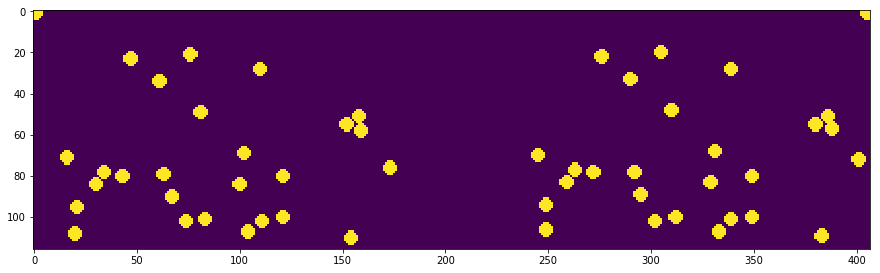

In [208]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.imshow(mask_img4)

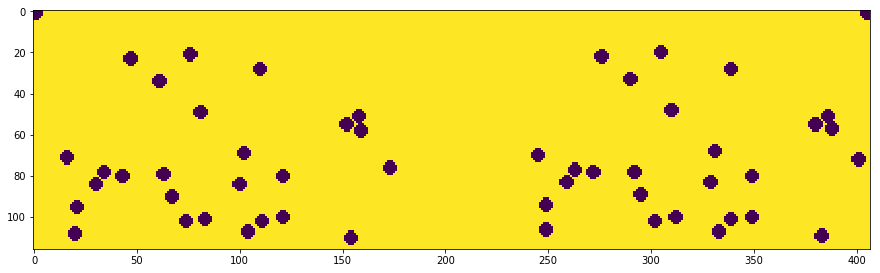

In [282]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.imshow(run_mmi_numba())

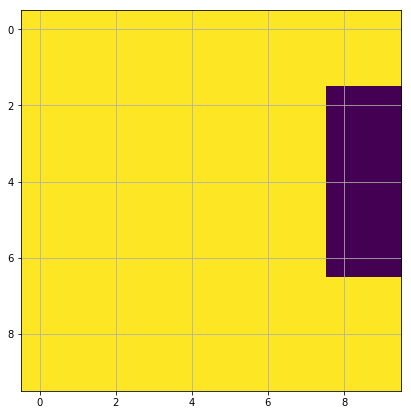

In [335]:
fig, ax = plt.subplots(figsize=(7, 7))
idx = np.array([[4, 10]])
m = np.ones((5, 5), dtype=bool)
mi = brightness._make_mask_image(idx, m, (10, 10))
#mi[idx[0, 0], idx[0, 1]] = True
ax.imshow(mi)
ax.grid()

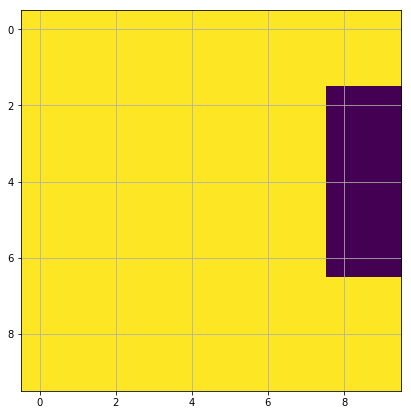

In [338]:
fig, ax = plt.subplots(figsize=(7, 7))
idx = np.array([[4, 10]])
m = np.ones((5, 5), dtype=bool)
mi = brightness._make_mask_image_numba(*brightness._get_mask_boundaries(idx, m.shape, (10, 10)), m, (10, 10))
#mi[idx[0, 0], idx[0, 1]] = True
ax.imshow(mi)
ax.grid()

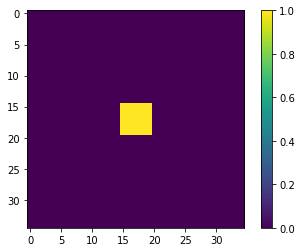

In [220]:
b1 = np.ones((5, 5), dtype=bool)
c1 = signal.fftconvolve(a, b1, "same")
plt.imshow(c1)
plt.colorbar()

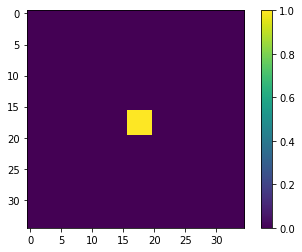

In [221]:
b2 = np.ones((4, 4), dtype=bool)
c2 = signal.fftconvolve(a, b2, "same")
plt.imshow(c2)
plt.colorbar()

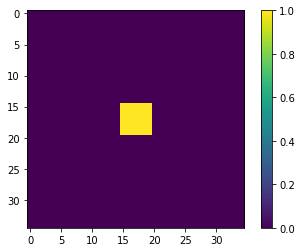

In [259]:
r = b1.shape[0] // 2
c3 = a.copy()
c3[17-r:17-r+b1.shape[0], 17-r:17-r+b1.shape[1]] = b1
plt.imshow(c3)
plt.colorbar()

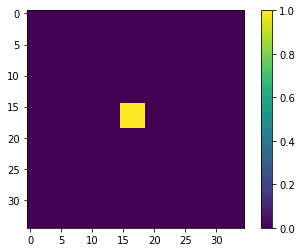

In [268]:
r4 = b2.shape[0] // 2
c4 = a.copy()
c4[17-b2.shape[0]+r4:17+r4, 17-b2.shape[1]+r4:17+r4] = b2
plt.imshow(c4)
plt.colorbar()

In [273]:
(4 + 1) / 2

2.5

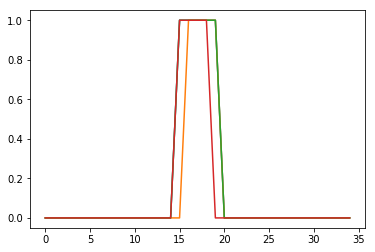

In [269]:
plt.plot(c1[17])
plt.plot(c2[17])
plt.plot(c3[17])
plt.plot(c4[17])

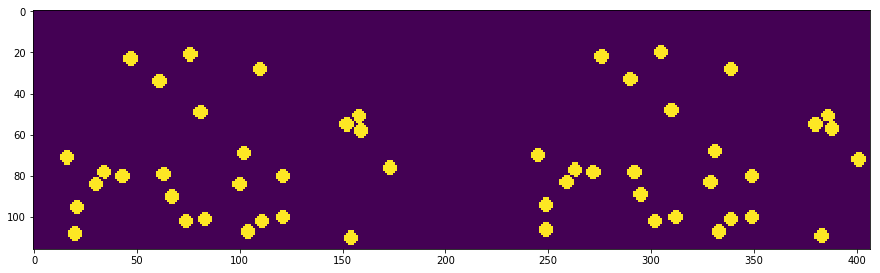

In [98]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.imshow(mask_img)

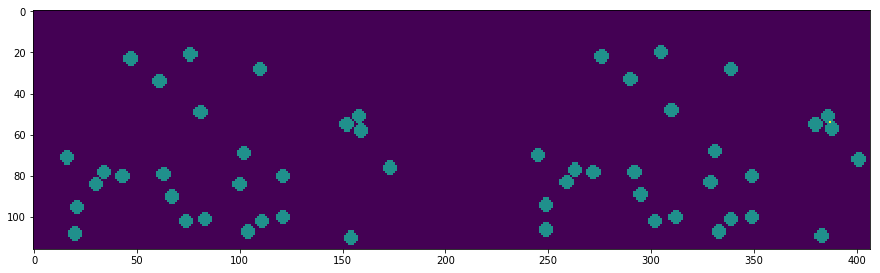

In [50]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.imshow(mask_img2)

# Distribution

In [8]:
mass = np.random.normal(300, 150, 5000)
mass[mass <= 0] = 1

In [39]:
%timeit brightness.Distribution(mass, 1000, gauss_width=5, engine="python")

121 ms ± 3.19 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [55]:
%timeit brightness.Distribution(mass, 1000, gauss_width=5, engine="numba")

98.6 ms ± 5.33 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [49]:
%lprun -f brightness.Distribution.__init__ brightness.Distribution(mass, 1000, gauss_width=5, engine="numba")

Timer unit: 1e-06 s

Total time: 0.053805 s
File: ../sdt/brightness.py
Function: __init__ at line 329

Line #      Hits         Time  Per Hit   % Time  Line Contents
   329                                               def __init__(self, data, abscissa, smooth=2., cam_eff=1., gauss_width=5,
   330                                                            engine="numba"):
   331                                                   """Parameters
   332                                                   ----------
   333                                                   data : list of pandas.DataFrame or pandas.DataFrame or numpy.ndarray
   334                                                       If a DataFrame is given, extract the masses from the "mass" column.
   335                                                       A list of DataFrames will be concatenated. Brightness values can
   336                                                       also be passed as an one-dimensional ndarray

In [28]:
%lprun -f brightness.Distribution.__init__ brightness.Distribution(mass, 1000, gauss_width=np.inf)

Timer unit: 1e-06 s

Total time: 0.18335 s
File: ../sdt/brightness.py
Function: __init__ at line 301

Line #      Hits         Time  Per Hit   % Time  Line Contents
   301                                               def __init__(self, data, abscissa, smooth=2., cam_eff=1., gauss_width=5):
   302                                                   """Parameters
   303                                                   ----------
   304                                                   data : list of pandas.DataFrame or pandas.DataFrame or numpy.ndarray
   305                                                       If a DataFrame is given, extract the masses from the "mass" column.
   306                                                       A list of DataFrames will be concatenated. Brightness values can
   307                                                       also be passed as an one-dimensional ndarray.
   308                                                   abscissa : numpy.ndarray

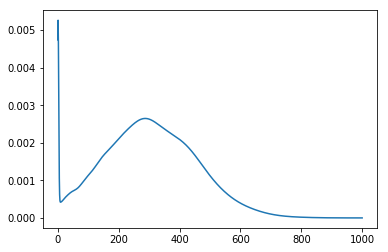

In [57]:
d = brightness.Distribution(mass, 1000, gauss_width=5, engine="numba")
d.plot()

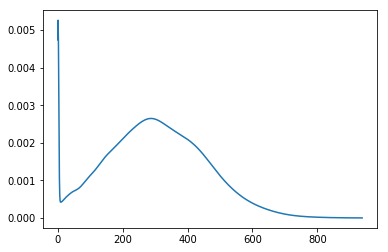

In [62]:
d = brightness.Distribution(mass, gauss_width=5, engine="numba")
d.plot()

In [60]:
d.graph[1][-1]

3.5754527946003939e-06

In [65]:
s = pd.Series(np.arange(1000))
lst = [s.copy() for i in range(100)]

In [66]:
%timeit pd.concat(lst).values

1.57 ms ± 75.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [67]:
%timeit np.concatenate([l.values for l in lst])

97.3 µs ± 1.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
